In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from string import ascii_letters
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
rider = pd.read_csv('./riders_clean.csv')

In [3]:
    rider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29187597 entries, 0 to 29187596
Data columns (total 25 columns):
 #   Column              Dtype  
---  ------              -----  
 0   index               int64  
 1   ride_id             object 
 2   rideable_type       object 
 3   started_at          object 
 4   ended_at            object 
 5   start_station_name  object 
 6   start_station_id    int64  
 7   end_station_name    object 
 8   end_station_id      int64  
 9   start_lat           float64
 10  start_lng           float64
 11  end_lat             float64
 12  end_lng             float64
 13  member_casual       object 
 14  year                int64  
 15  start_date          object 
 16  stop_date           object 
 17  start_hour          int64  
 18  stop_hour           int64  
 19  start_min           int64  
 20  stop_min            int64  
 21  month               int64  
 22  season              int64  
 23  dayofweek           int64  
 24  tripduration        fl

In [4]:
# prep input data
hier_input = rider.groupby(['start_station_name', 'start_hour']).count().loc[:,['tripduration']].reset_index()
hier_input = hier_input.pivot_table(values='tripduration', 
                                    index=['start_station_name'], 
                                    columns='start_hour', 
                                    aggfunc=np.sum).fillna(0)

In [5]:
hier_input = hier_input.apply(lambda x: x/300, axis=0)

In [6]:
hier_input

start_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start_station_name,,,,,,,,,,,,,,,,,,,,,
1 Ave & E 110 St,0.870000,0.660000,0.386667,0.163333,0.230000,1.100000,2.243333,4.916667,5.076667,3.983333,...,4.460000,5.653333,5.490000,5.253333,4.816667,4.026667,2.690000,1.806667,1.656667,1.403333
1 Ave & E 16 St,5.306667,3.586667,2.513333,1.730000,1.380000,2.640000,7.440000,10.600000,17.830000,16.193333,...,15.853333,17.253333,17.713333,20.163333,20.020000,16.800000,12.273333,9.540000,8.170000,7.243333
1 Ave & E 18 St,3.333333,1.936667,1.356667,0.906667,0.770000,2.336667,6.866667,12.066667,20.983333,15.070000,...,14.416667,14.640000,15.420000,18.676667,19.720000,16.060000,10.413333,6.950000,5.096667,4.280000
1 Ave & E 30 St,1.476667,0.786667,0.580000,0.403333,0.640000,1.043333,2.763333,9.986667,10.330000,9.060000,...,10.413333,11.903333,14.413333,11.703333,9.633333,7.400000,4.430000,3.020000,2.956667,2.573333
1 Ave & E 39 St,2.003333,1.230000,0.930000,0.556667,0.440000,1.706667,5.423333,10.163333,14.906667,11.010000,...,11.340000,12.970000,13.353333,16.073333,16.876667,12.030000,7.780000,4.723333,3.996667,3.716667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyckoff Av & Stanhope St,2.180000,1.570000,1.080000,0.646667,0.450000,0.313333,0.606667,1.400000,1.830000,1.693333,...,2.563333,3.410000,3.290000,3.440000,3.360000,3.380000,2.736667,2.596667,2.403333,2.670000
Wyckoff Ave & Gates Ave,1.656667,1.086667,0.723333,0.496667,0.376667,0.240000,0.280000,0.640000,1.460000,1.660000,...,2.973333,2.970000,2.980000,3.736667,3.663333,3.480000,3.123333,2.466667,2.196667,1.810000
Wyckoff St & Nevins St,0.380000,0.290000,0.156667,0.073333,0.050000,0.106667,0.350000,1.076667,2.136667,2.030000,...,2.386667,2.203333,2.880000,2.543333,2.590000,2.106667,1.650000,1.370000,1.190000,0.663333


In [7]:
kmean_input = hier_input.apply(lambda t: (t - t.mean())/t.std())

In [8]:
kmean_input.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1615 entries, 1 Ave & E 110 St to Yankee Ferry Terminal
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1615 non-null   float64
 1   1       1615 non-null   float64
 2   2       1615 non-null   float64
 3   3       1615 non-null   float64
 4   4       1615 non-null   float64
 5   5       1615 non-null   float64
 6   6       1615 non-null   float64
 7   7       1615 non-null   float64
 8   8       1615 non-null   float64
 9   9       1615 non-null   float64
 10  10      1615 non-null   float64
 11  11      1615 non-null   float64
 12  12      1615 non-null   float64
 13  13      1615 non-null   float64
 14  14      1615 non-null   float64
 15  15      1615 non-null   float64
 16  16      1615 non-null   float64
 17  17      1615 non-null   float64
 18  18      1615 non-null   float64
 19  19      1615 non-null   float64
 20  20      1615 non-null   float64
 21  21      16

In [9]:
# model fitting kmeans

from sklearn.cluster import KMeans
kmeans = KMeans()

kmeans.set_params(n_clusters = 4)
kmeans.fit(kmean_input)

c:\Users\20228\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


KMeans(n_clusters=4)

In [10]:
coor = rider[['start_station_name', 'start_lat', 'start_lng']].groupby('start_station_name').mean()

In [11]:
# adding back coordination
station_plt = pd.merge(kmean_input, coor, 
                       left_on = 'start_station_name', 
                       right_on = 'start_station_name',
                       how = 'left')

In [12]:
# plotting clusters
import plotly.express as px
import plotly.graph_objects as go

In [13]:
station_plt['cluster'] = kmeans.labels_

In [27]:
station_plt

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,start_lat,start_lng,cluster
start_station_name,,,,,,,,,,,,,,,,,,,,,
1 Ave & E 110 St,0.000954,0.154695,0.043575,-0.216626,0.130467,1.016870,0.680134,0.920958,0.416314,0.325949,...,-0.024283,-0.059182,0.019191,-0.005872,-0.077549,0.003630,0.091223,40.792328,-73.938298,0
1 Ave & E 16 St,4.068696,4.161720,4.146916,4.548775,4.781324,3.220744,3.865875,2.906665,3.521810,3.926123,...,2.192265,2.337733,2.718556,2.969472,3.168897,3.284268,3.887804,40.732220,-73.981655,1
1 Ave & E 18 St,2.259452,1.902634,1.915162,2.044404,2.314347,2.786648,3.514401,3.419105,4.289662,3.594903,...,1.971254,2.290436,2.562173,2.391996,2.081618,1.736290,1.961343,40.733814,-73.980543,1
1 Ave & E 30 St,0.557174,0.328120,0.416606,0.513393,1.788598,0.935775,0.998913,2.692372,1.695525,1.822827,...,0.934586,0.700200,0.732072,0.534347,0.431807,0.658415,0.851840,40.741445,-73.975360,3
1 Ave & E 39 St,1.040046,0.935106,1.091921,0.979794,0.979754,1.885063,2.629587,2.754097,2.809965,2.397793,...,1.584238,1.842164,1.710521,1.574423,1.146865,1.182242,1.595120,40.747142,-73.971129,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyckoff Av & Stanhope St,1.202023,1.400615,1.381342,1.253551,1.020196,-0.108919,-0.323201,-0.307734,-0.374264,-0.349269,...,-0.293856,-0.288836,-0.117467,0.008616,0.254092,0.379712,0.914683,40.703544,-73.917778,0
Wyckoff Ave & Gates Ave,0.722206,0.738862,0.693164,0.797289,0.723620,-0.213866,-0.523459,-0.573271,-0.464361,-0.359097,...,-0.249753,-0.241014,-0.096335,0.128665,0.199518,0.275618,0.355597,40.699871,-73.911717,0
Wyckoff St & Nevins St,-0.448301,-0.351888,-0.400203,-0.490383,-0.597493,-0.404677,-0.480546,-0.420704,-0.299590,-0.250001,...,-0.427156,-0.410233,-0.386559,-0.328762,-0.260861,-0.231421,-0.389850,40.683426,-73.984274,2


In [21]:
a = station_plt['cluster'].groupby(station_plt['cluster']).count()

In [22]:
a

cluster
0    380
1    106
2    953
3    176
Name: cluster, dtype: int64

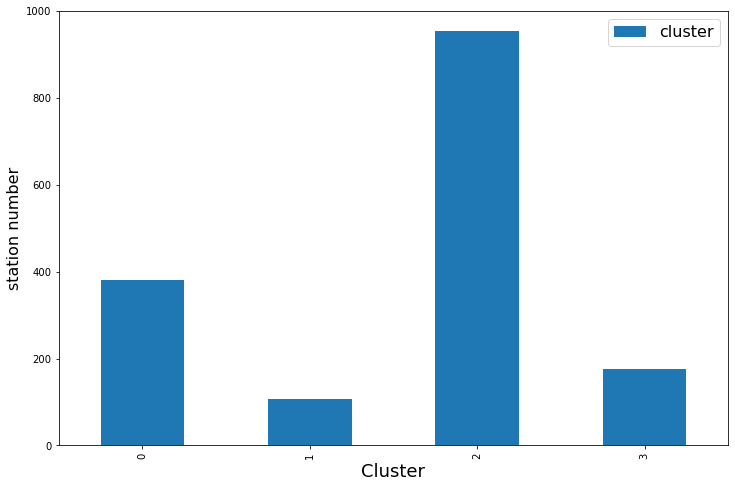

In [26]:
plt.figure(figsize=(12,8))



a.plot(kind='bar')
plt.xlabel('Cluster', fontsize=18)
plt.ylabel('station number', fontsize=16)
plt.legend(loc='upper right', fontsize=16)

In [30]:
station_plt['cluster'].nunique()

4

In [31]:
station_plt.sort_values(by='cluster', inplace=True)

In [32]:
station_plt['cluster'] = station_plt['cluster'].astype('str')

In [91]:
station_plt.to_csv('station_plt.csv',index=False)

In [33]:
station_plt = station_plt.reset_index()

In [74]:
df = station_plt
access_token = 'pk.eyJ1IjoibWFwYm94IiwiYSI6ImNpejY4M29iazA2Z2gycXA4N2pmbDZmangifQ.-g_vE53SD2WrJ6tFX7QHmA'
px.set_mapbox_access_token(access_token)
plot_kmeans = px.scatter_mapbox(df, 
                                 lat='start_lat', 
                                 lon='start_lng',color='cluster',
                                 zoom=10,
                                 #hover_name= station_plt.index,
                                 title = 'K-means Clustering',

                                 width=1200,
                                 height=1000,
                                 mapbox_style='open-street-map')

plot_kmeans.show()

In [94]:
plot_kmeans.write_html("k-means.html")

In [38]:
import scikitplot.plotters as skplt 
# import plot_elbow_curve, plot_silhouette

In [39]:
# result from kmeans
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

eda_plot = hier_input.copy()
eda_plot['cluster'] = kmeans.labels_
eda_plot['cluster'] = eda_plot['cluster']

eda_plot = eda_plot.groupby('cluster').mean().T

In [52]:
eda_plot

cluster,0,1,2,3
start_hour,,,,
0,1.014342,3.794340,0.266863,2.053409
1,0.610833,2.446730,0.174537,1.281951
2,0.387956,1.700283,0.117345,0.843807
3,0.249456,1.069874,0.084092,0.513977
4,0.220474,0.776981,0.084505,0.412936
5,0.436886,1.599874,0.136719,0.926439
6,1.383298,4.551038,0.315086,2.970890
7,2.940175,8.328522,0.667527,5.950019
8,4.366728,13.084843,0.887062,8.783920


<Figure size 864x576 with 0 Axes>

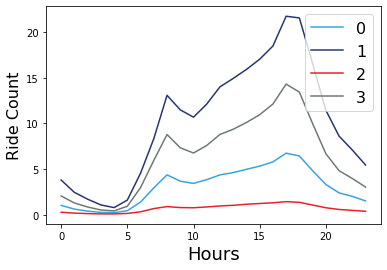

In [60]:
#sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3'})
#colors = ["#39a2e1", "#263571", "#ea2029", '#6d7874']
#sns.set_palette(sns.color_palette(colors))


# sns.lineplot(data = eda_plot, x = eda_plot.index, y = eda_plot.cluster) #, hue="month")

plt.figure(figsize=(12,8))
eda_plot.plot()
plt.xlabel('Hours', fontsize=18)
plt.ylabel('Ride Count', fontsize=16)
plt.legend(loc='upper right', fontsize=16)
plt.show()

In [23]:
import scikitplot.plotters as skplt 
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

c:\Users\20228\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.

c:\Users\20228\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.

c:\Users\20228\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.

c:\Users\20228\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

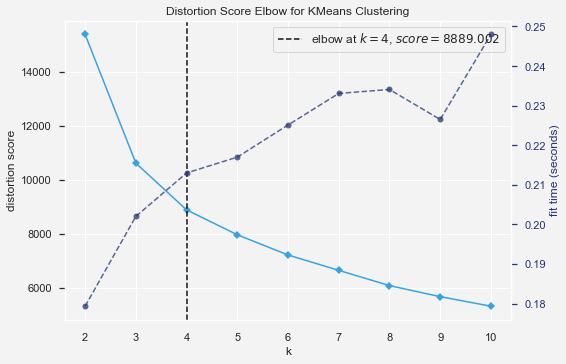

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
elb_visualizer = KElbowVisualizer(kmeans, k=(2,11))
elb_visualizer.fit(kmean_input)    
elb_visualizer.show()

In [51]:
# model fitting kmeans

from sklearn.cluster import KMeans
kmeans = KMeans()

kmeans.set_params(n_clusters = 3)
kmeans.fit(kmean_input)

c:\Users\20228\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.



KMeans(n_clusters=6)

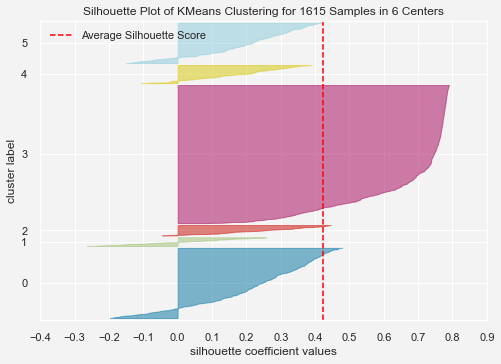

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1615 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [53]:

# Instantiate the clustering model and visualizer

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(kmean_input)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure